In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [2]:
def rmse(predictor,target):
    return np.sqrt(((predictor - target) ** 2).mean())

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#Check for any null values
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [7]:
#Fill the null values with 0

df.fillna(0, inplace= True)

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [9]:
df = df.astype({'Product_Category_2': int, 'Product_Category_3': int})

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [11]:
#Mapping gender values
gender = {'F':0, 'M':1}

df['Gender'] = df['Gender'].map(gender)
df = df.rename(columns={'Gender': 'isMale'})

In [12]:
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0,0,7969


In [13]:
df.sort_values('Age', inplace=True)
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
48932,1001499,P00100442,1,0-17,10,C,1,0,2,4,5,13129
48933,1001499,P00255842,1,0-17,10,C,1,0,16,0,0,20195
48934,1001499,P00070342,1,0-17,10,C,1,0,1,2,14,15819
48935,1001499,P00275542,1,0-17,10,C,1,0,1,0,0,7587


In [14]:
df['Age'] = df['Age'].factorize()[0]

In [15]:
df.tail()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
47161,1001252,P00357242,1,6,13,C,3,0,5,0,0,7134
47162,1001252,P00322942,1,6,13,C,3,0,2,8,16,16325
114629,1005686,P00101942,1,6,16,A,1,1,8,17,0,4056
188070,1005033,P00112342,0,6,13,C,1,1,13,16,0,936
132077,1002280,P00004142,1,6,6,B,2,1,8,17,0,7900


Mapping Age column to dummy values:

0-17: 0<br>
18-25: 1<br>
26-35: 2<br>
36-45: 3<br>

46-50: 4

51-55: 5

55+ : 6


In [16]:
city = {'A': 1, 'B': 2, 'C':3}

df['City_Category'] = df['City_Category'].map(city)

df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,1,2,0,3,0,0,8370
48932,1001499,P00100442,1,0,10,3,1,0,2,4,5,13129
48933,1001499,P00255842,1,0,10,3,1,0,16,0,0,20195
48934,1001499,P00070342,1,0,10,3,1,0,1,2,14,15819
48935,1001499,P00275542,1,0,10,3,1,0,1,0,0,7587


In [17]:
df['Stay_In_Current_City_Years'].replace({'4+':4}, inplace=True)

In [18]:
df['Product_ID'] = df['Product_ID'].str[1:] # Drop the first character ‘P’ from product id
df = df.astype({'Product_ID':int,'Stay_In_Current_City_Years':int}) # Recast all strings as ints

In [19]:
train, test = train_test_split(df,test_size=0.3)

In [20]:
X = train.drop('Purchase',axis=1)
y = train.Purchase

In [21]:
np.asarray(X)

array([[1005076,  319342,       1, ...,       5,       8,       0],
       [1000752,   28042,       0, ...,       1,      16,       0],
       [1005220,  280542,       1, ...,      11,       0,       0],
       ...,
       [1000331,   70042,       1, ...,       1,       2,      16],
       [1005165,   80342,       1, ...,       1,       6,       8],
       [1001358,  241542,       1, ...,       1,       6,       0]])

In [22]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [23]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     6388.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:54:10   Log-Likelihood:            -3.7953e+06
No. Observations:              385047   AIC:                         7.591e+06
Df Residuals:                  385035   BIC:                         7.591e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2190.9223   4330.411     -0.506      0.613   -1.07e+04    6296.555
User_ID                        0.0118      0.004      2.739      0.006       0.003       0.020
Product_ID                    -0.0028   7.35e-05    -38.018      0.000      -0.003      -0.003
isMale                       495.3587     17.405     28.460      0.000     461.244     529.473
Age                          112.7791      5.865     19.230      0.000     101.284     124.274
Occupation                     6.5126      1.155      5.638      0.000       4.249       8.776
City_Category                316.0291      9.880     31.987      0.000     296.665     335.393
Stay_In_Current_City_Years     7.7045      5.777      1.334      0.182      -3.618      19.027
Marital_Status               -44.4050     15.938     -2.786      0.005     -75.642     -13.168
Product_Category_1          -344.1177      2.059   -167.153      0.000    -348.153    -340.083
Product_Category_2             9.5294      1.207      7.894      0.000       7.163      11.895
Product_Category_3           137.5483      1.305    105.427      0.000     134.991     140.105
==============================================================================
Omnibus:                    39022.287   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53779.112
Skew:                           0.821   Prob(JB):                         0.00
Kurtosis:                       3.811   Cond. No.                     5.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sta_In_Current_City_Years has a p-value >= 0.05, so it will be dropped.

In [24]:
X = train.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)
X.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
110899,1005076,319342,1,2,3,2,0,5,8,0
277189,1000752,28042,0,2,3,1,0,1,16,0
540446,1005220,280542,1,2,7,2,0,11,0,0
472301,1000783,118342,1,2,4,1,0,2,3,15
477637,1001579,34942,1,2,0,1,0,8,0,0


In [25]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     7027.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:54:11   Log-Likelihood:            -3.7953e+06
No. Observations:              385047   AIC:                         7.591e+06
Df Residuals:                  385036   BIC:                         7.591e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2009.4694   4328.278     -0.464      0.642   -1.05e+04    6473.826
User_ID                0.0117      0.004      2.701      0.007       0.003       0.020
Product_ID            -0.0028   7.35e-05    -38.023      0.000      -0.003      -0.003
isMale               495.6396     17.404     28.478      0.000     461.528     529.751
Age                  112.7471      5.865     19.225      0.000     101.252     124.242
Occupation             6.5549      1.155      5.677      0.000       4.292       8.818
City_Category        316.3077      9.878     32.023      0.000     296.948     335.667
Marital_Status       -44.6433     15.937     -2.801      0.005     -75.879     -13.408
Product_Category_1  -344.1237      2.059   -167.156      0.000    -348.159    -340.089
Product_Category_2     9.5312      1.207      7.896      0.000       7.165      11.897
Product_Category_3   137.5484      1.305    105.427      0.000     134.991     140.106
==============================================================================
Omnibus:                    39021.138   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53777.124
Skew:                           0.821   Prob(JB):                         0.00
Kurtosis:                       3.811   Cond. No.                     5.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Human behavior is imprecise, so a lower R-squared may be OK so long as the independent variables are significant.

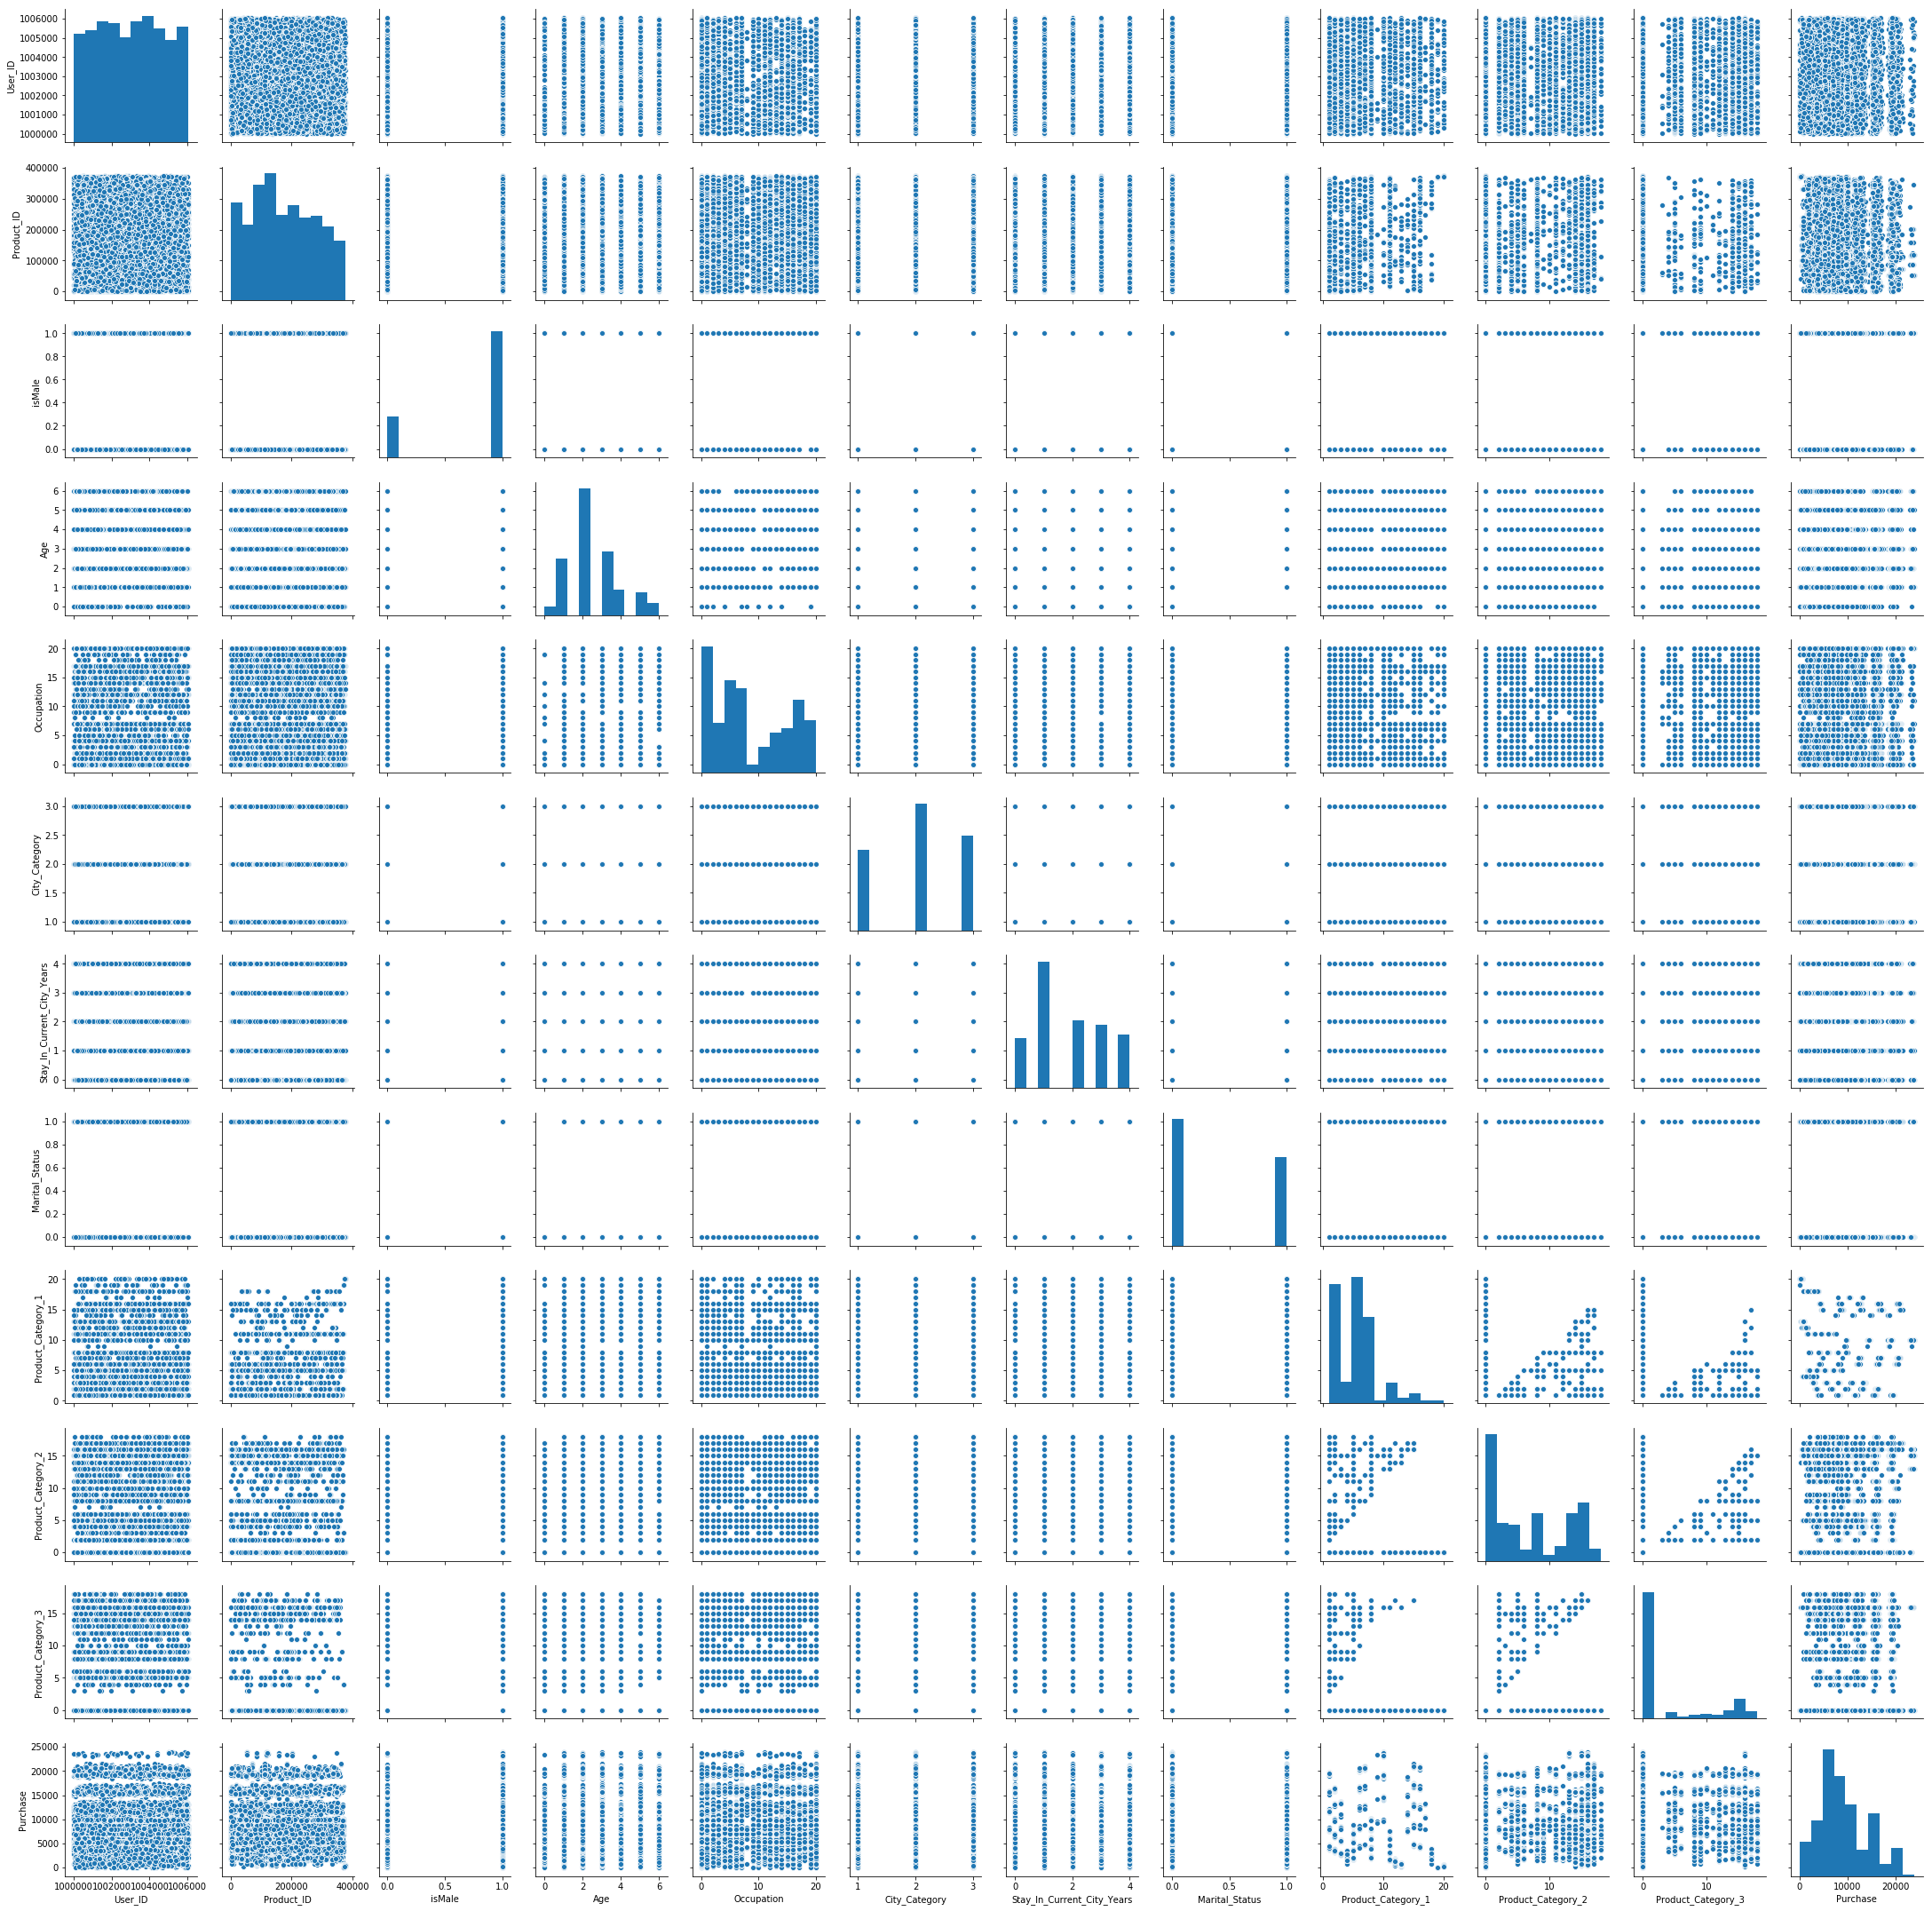

In [26]:
tempSlice = train.sample(n=10000) # Using a small slice to run a pairplot on - should give us an accurate idea of any relations while being efficient
sns.pairplot(tempSlice)

There appear to be relationships between the product categories.

In [27]:
prediction = multivar_model.predict(sm.add_constant(test.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)))

In [28]:
rmse(prediction,test['Purchase'])

4612.566680232216

Testing simple, single-var models

In [29]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    X = train[c]
    y = train.Purchase
    model = sm.OLS(y,sm.add_constant(X)).fit()
    print(c)
    print('Adjusted R-Squared: '+str(model.rsquared_adj))
    prediction = model.predict(sm.add_constant(test[c]))
    print('RMSE: '+str(rmse(prediction,test['Purchase'])))
    print('\n')

User_ID
Adjusted R-Squared: 1.7360713585379273e-05
RMSE: 5024.790152256853


Product_ID
Adjusted R-Squared: 0.011045252934426375
RMSE: 4999.054982898649


isMale
Adjusted R-Squared: 0.0036490211094181157
RMSE: 5015.759156399093


Age
Adjusted R-Squared: 0.0002814291579972261
RMSE: 5024.4313112031805


Occupation
Adjusted R-Squared: 0.0004664946476227172
RMSE: 5023.979716194942


City_Category
Adjusted R-Squared: 0.0037578768609798363
RMSE: 5014.794949784963


Marital_Status
Adjusted R-Squared: -2.5232695695098784e-06
RMSE: 5024.8620168192765


Product_Category_1
Adjusted R-Squared: 0.11721275683355903
RMSE: 4713.025538008344


Product_Category_2
Adjusted R-Squared: 0.002776173538628912
RMSE: 5018.248971500322


Product_Category_3
Adjusted R-Squared: 0.0826969902842879
RMSE: 4807.941740332776




Simple models do not beat the basic multivariate model on RMSE.

Testing individual parameter transformations in a multivariate model.

In [30]:
df.User_ID.eq(0).any()

False

In [31]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    print(c)
    for t in ['square','sqrt','log']:
        loopDf = df.copy()
        if t == 'square': loopDf[c+'_'+t] = loopDf[c]**2
        elif t == 'sqrt': loopDf[c+'_'+t] = np.sqrt(loopDf[c])
        elif t == 'log': 
            if loopDf[c].eq(0).any() == True: #np.log will throw a divide by 0 error if 0 exists
                print('0 in '+c+', skipping')
                continue
            else: loopDf[c+'_'+t] = np.log(loopDf[c])
        loopDf.drop(c,axis=1,inplace=True)
        loopTrain, loopTest = train_test_split(loopDf,test_size=0.3)
        X = loopTrain.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
        y = loopTrain.Purchase
        model = sm.OLS(y,sm.add_constant(X)).fit()
        print(t)
        print('Adjusted R-Squared: '+str(model.rsquared_adj))
        prediction = model.predict(sm.add_constant(loopTest.drop(['Purchase', 'Stay_In_Current_City_Years'],axis=1)))
        print('RMSE: '+str(rmse(prediction,loopTest['Purchase'])))
    print('\n')

User_ID
square
Adjusted R-Squared: 0.15395412886861848
RMSE: 4601.868346514853
sqrt
Adjusted R-Squared: 0.1563747912735055
RMSE: 4632.794152429875
log
Adjusted R-Squared: 0.15441192402345838
RMSE: 4608.980674141769


Product_ID
square
Adjusted R-Squared: 0.15548285280379281
RMSE: 4611.596810736951
sqrt
Adjusted R-Squared: 0.1547797051421621
RMSE: 4619.096934866809
log
Adjusted R-Squared: 0.15262628987725646
RMSE: 4619.251336231114


isMale
square
Adjusted R-Squared: 0.15402791075578504
RMSE: 4610.684407579489
sqrt
Adjusted R-Squared: 0.155553117210823
RMSE: 4603.04015218437
0 in isMale, skipping


Age
square
Adjusted R-Squared: 0.15371662242349493
RMSE: 4609.036582764261
sqrt
Adjusted R-Squared: 0.1553551964152886
RMSE: 4607.328064621604
0 in Age, skipping


Occupation
square
Adjusted R-Squared: 0.1546253083118826
RMSE: 4609.4150812017615
sqrt
Adjusted R-Squared: 0.15607920584747714
RMSE: 4622.993999432886
0 in Occupation, skipping


City_Category
square
Adjusted R-Squared: 0.156679080

Certain transformations improve the RMSE, particularly log(Product_Category_1).

In [32]:
freq = np.unique(train.Purchase,return_counts = True)[1]
unique = np.unique(train.Purchase,return_counts = True)[0]

[]

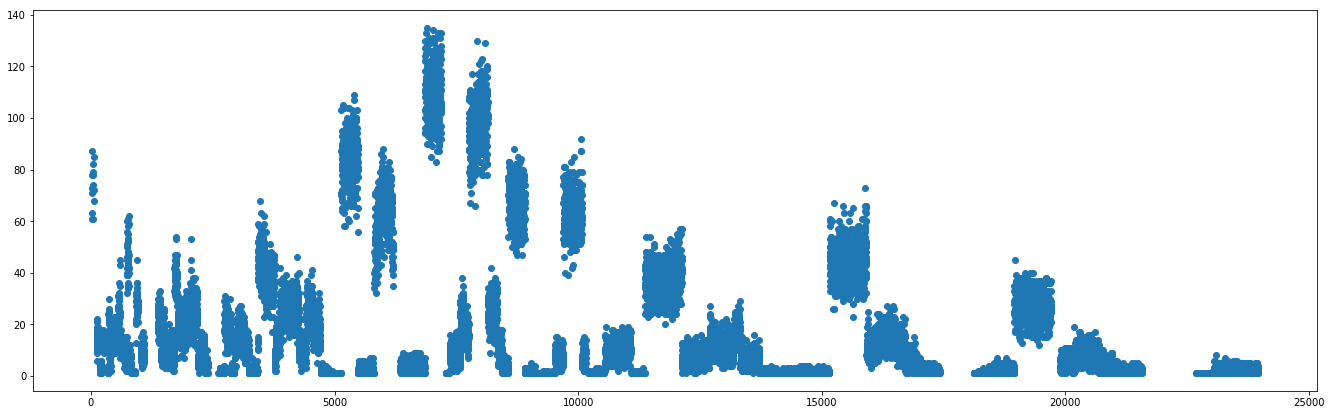

In [33]:
plt.figure(figsize=(23,7))
plt.scatter(unique,freq)
plt.plot()

Purchase numbers appear to be normally distributed until ~15000

In [34]:
lasso_model = LassoCV(alphas=np.logspace(-4,0,100),normalize=True,max_iter=100000,cv=5)
X = train.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)
y = train.Purchase

In [35]:
lasso_model.fit(X,y)

LassoCV(alphas=array([1.00000e-04, 1.09750e-04, ..., 9.11163e-01, 1.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [36]:
lasso_predict = lasso_model.predict(test.drop(['Purchase','Stay_In_Current_City_Years'],axis=1))

In [37]:
print(rmse(lasso_predict,test.Purchase))

4612.5665336366665


In [38]:
ridge_model = RidgeCV(alphas=np.logspace(-5,0,100),normalize=True)

In [39]:
ridge_model.fit(X,y)
ridge_predict = ridge_model.predict(test.drop(['Purchase','Stay_In_Current_City_Years'],axis=1))

In [40]:
print(rmse(ridge_predict,test.Purchase))

4612.568664018183


As per professor's suggestion, split on Purchase = 15000 (It's not exactly 15000, but close enough)

In [41]:
dfLow = df[(df.Purchase <= 15000)]
dfHigh = df[(df.Purchase > 15000)]

In [42]:
trainLow, testLow = train_test_split(dfLow,test_size=0.3)

In [43]:
Xlow = trainLow.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
yLow = trainLow.Purchase

In [44]:
multivar_model = sm.OLS(yLow,sm.add_constant(Xlow)).fit()

In [45]:
predict = multivar_model.predict(sm.add_constant(testLow.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)))
print(rmse(predict,testLow.Purchase))

2872.288285688257


In [46]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     5283.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:54:57   Log-Likelihood:            -2.8859e+06
No. Observations:              307681   AIC:                         5.772e+06
Df Residuals:                  307670   BIC:                         5.772e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.205e+04   3005.424      4.010      0.000    6160.249    1.79e+04
User_ID               -0.0035      0.003     -1.183      0.237      -0.009       0.002
Product_ID            -0.0010   5.06e-05    -20.454      0.000      -0.001      -0.001
isMale                73.5337     11.882      6.188      0.000      50.244      96.823
Age                  100.0432      4.075     24.548      0.000      92.056     108.031
Occupation             1.4955      0.799      1.872      0.061      -0.070       3.061
City_Category        119.8289      6.871     17.440      0.000     106.362     133.295
Marital_Status       -14.6220     11.056     -1.323      0.186     -36.291       7.047
Product_Category_1  -290.9900      1.515   -192.122      0.000    -293.959    -288.021
Product_Category_2    -9.4442      0.831    -11.371      0.000     -11.072      -7.816
Product_Category_3    44.8460      0.963     46.554      0.000      42.958      46.734
==============================================================================
Omnibus:                      172.771   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.300
Skew:                           0.052   Prob(JB):                     6.35e-38
Kurtosis:                       2.949   Cond. No.                     5.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
trainHigh, testHigh = train_test_split(dfHigh,test_size=0.3)


In [48]:
Xhigh = trainHigh.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
yHigh = trainHigh.Purchase

In [49]:
multivar_model_high = sm.OLS(yHigh,sm.add_constant(Xhigh)).fit()

In [50]:
predict = multivar_model_high.predict(sm.add_constant(testHigh.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)))
print(rmse(predict,testHigh.Purchase))

1970.9601642053944


In [51]:
multivar_model_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:54:57   Log-Likelihood:            -6.9670e+05
No. Observations:               77366   AIC:                         1.393e+06
Df Residuals:                   77355   BIC:                         1.394e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.29e+04   4127.707      3.125      0.002    4810.789     2.1e+04
User_ID                0.0039      0.004      0.939      0.348      -0.004       0.012
Product_ID            -0.0027   7.38e-05    -36.878      0.000      -0.003      -0.003
isMale                35.1589     18.083      1.944      0.052      -0.283      70.601
Age                   -2.9702      5.577     -0.533      0.594     -13.901       7.960
Occupation            -1.7304      1.116     -1.550      0.121      -3.919       0.458
City_Category         82.4093      9.397      8.770      0.000      63.992     100.827
Marital_Status        19.0767     15.163      1.258      0.208     -10.643      48.796
Product_Category_1   167.7473      1.750     95.853      0.000     164.317     171.177
Product_Category_2    35.6340      1.233     28.896      0.000      33.217      38.051
Product_Category_3     4.4375      1.095      4.051      0.000       2.291       6.584
==============================================================================
Omnibus:                    54729.302   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7740.860
Skew:                           0.510   Prob(JB):                         0.00
Kurtosis:                       1.833   Cond. No.                     5.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Feature engineered dataset.

In [74]:
new_df = pd.read_csv('../data/new_df.csv')

In [75]:
new_df.head()

,Unnamed: 0,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,...,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Paid_more_avg,Num_Paid_more_avg,propHigh,luxury
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,...,13716,227,0,334093,0,1,0,19,0.542857,0
1,1,1000017,P00069042,M,51-55,1,C,0,0,3,...,13716,227,0,1425995,0,5,1,85,0.739130,1
2,2,1000023,P00069042,M,36-45,0,B,3,1,3,...,13716,227,0,1670998,0,6,0,60,0.350877,0
3,3,1000030,P00069042,F,36-45,7,C,3,0,3,...,13716,227,0,261584,0,1,0,10,0.322581,0
4,4,1000073,P00069042,M,18-25,4,A,4+,0,3,...,13716,227,0,1428303,0,5,0,70,0.522388,0


In [76]:
new_df.fillna(0, inplace= True)

new_df = new_df.astype({'Product_Category_2': int, 'Product_Category_3': int})
#Mapping gender values
gender = {'F':0, 'M':1}

new_df['Gender'] = new_df['Gender'].map(gender)
new_df = new_df.rename(columns={'Gender': 'isMale'})

new_df.sort_values('Age', inplace=True)
new_df['Age'] = new_df['Age'].factorize()[0]

city = {'A': 1, 'B': 2, 'C':3}

new_df['City_Category'] = new_df['City_Category'].map(city)

new_df['Stay_In_Current_City_Years'].replace({'4+':4}, inplace=True)

new_df['Product_ID_x'] = new_df['Product_ID_x'].str[1:] # Drop the first character ‘P’ from product id
new_df = new_df.astype({'Product_ID_x':int,'Stay_In_Current_City_Years':int}) # Recast all strings as ints

In [77]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [78]:
newTrain, newTest = train_test_split(new_df, test_size=0.3)

In [79]:
newTrain.columns

Index(['User_ID_x', 'Product_ID_x', 'isMale', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase_price_x', 'User_prod_bought', 'Mean_Purchase_price',
       'Min_purchase_price', 'Max_purchase_price', 'Quantity_sold',
       'Popular_item', 'Amount_user_spent', 'High_spender', 'User_category',
       'Paid_more_avg', 'Num_Paid_more_avg', 'propHigh', 'luxury'],
      dtype='object')

In [80]:
X = newTrain.drop('Purchase_price_x',axis=1)
y = newTrain.Purchase_price_x

In [81]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [82]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Purchase_price_x   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.665e+05
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:58:18   Log-Likelihood:            -3.3591e+06
No. Observations:              385047   AIC:                         6.718e+06
Df Residuals:                  385022   BIC:                         6.719e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        973.5826   1396.574      0.697      0.486   -1763.660    3710.825
User_ID_x                     -0.0019      0.001     -1.393      0.164      -0.005       0.001
Product_ID_x                  -0.0003    2.4e-05    -11.787      0.000      -0.000      -0.000
isMale                       -26.7558      5.895     -4.539      0.000     -38.310     -15.202
Age                           12.8728      1.912      6.734      0.000       9.126      16.619
Occupation                    -0.0598      0.374     -0.160      0.873      -0.792       0.673
City_Category                 18.1007      3.762      4.811      0.000      10.726      25.475
Stay_In_Current_City_Years     4.3776      1.864      2.348      0.019       0.724       8.032
Marital_Status                 8.4153      5.141      1.637      0.102      -1.662      18.492
Product_Category_1            -7.5041      0.734    -10.227      0.000      -8.942      -6.066
Product_Category_2             2.5458      0.391      6.517      0.000       1.780       3.311
Product_Category_3            -8.5928      0.442    -19.453      0.000      -9.459      -7.727
User_prod_bought              -2.4180      0.083    -29.202      0.000      -2.580      -2.256
Mean_Purchase_price            0.7293      0.002    341.016      0.000       0.725       0.734
Min_purchase_price             0.0416      0.005      8.946      0.000       0.032       0.051
Max_purchase_price             0.0283      0.002     17.509      0.000       0.025       0.032
Quantity_sold                 -0.1661      0.013    -12.437      0.000      -0.192      -0.140
Popular_item                  76.7528      9.851      7.792      0.000      57.446      96.060
Amount_user_spent              0.0005   1.45e-05     32.485      0.000       0.000       0.000
High_spender                  -2.9169      9.583     -0.304      0.761     -21.699      15.865
User_category                -11.2991      2.160     -5.232      0.000     -15.532      -7.066
Paid_more_avg               2880.4154      5.569    517.234      0.000    2869.501    2891.330
Num_Paid_more_avg             -2.6283      0.108    -24.334      0.000      -2.840      -2.417
propHigh                    1445.4458     23.504     61.497      0.000    1399.378    1491.514
luxury                      3375.5433      8.765    385.133      0.000    3358.365    3392.722
==============================================================================
Omnibus:                    57097.709   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149548.208
Skew:                          -0.826   Prob(JB):                         0.00
Kurtosis:                       5.567   Cond. No.                     1.50e+09
============================

In [83]:
predict = multivar_model.predict(sm.add_constant(newTest.drop('Purchase_price_x',axis=1)))
print(rmse(predict,newTest.Purchase_price_x))

1488.6368923659602


In [84]:
lasso_model.fit(X,y)

LassoCV(alphas=array([1.00000e-04, 1.09750e-04, ..., 9.11163e-01, 1.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [85]:
lasso_predict = lasso_model.predict(newTest.drop('Purchase_price_x',axis=1))
print(rmse(lasso_predict,newTest.Purchase_price_x))

1488.6355344354774


In [86]:
df_reduced = new_df.copy()

In [87]:
df_reduced.drop(['User_ID_x','isMale','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','High_spender'],axis=1,inplace=True)

In [88]:
reducedTrain, reducedTest = train_test_split(df_reduced,test_size = 0.3)

In [89]:
X = reducedTrain.drop('Purchase_price_x',axis=1)
y = reducedTrain.Purchase_price_x

In [90]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [91]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Purchase_price_x   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 2.354e+05
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:58:37   Log-Likelihood:            -3.3593e+06
No. Observations:              385047   AIC:                         6.719e+06
Df Residuals:                  385029   BIC:                         6.719e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -919.1758     20.683    -44.441      0.000    -959.714    -878.637
Product_ID_x           -0.0003    2.4e-05    -11.871      0.000      -0.000      -0.000
City_Category          21.4801      3.734      5.752      0.000      14.161      28.799
Product_Category_1     -7.9839      0.733    -10.892      0.000      -9.421      -6.547
Product_Category_2      2.4275      0.391      6.214      0.000       1.662       3.193
Product_Category_3     -8.5111      0.441    -19.290      0.000      -9.376      -7.646
User_prod_bought       -2.4003      0.080    -29.843      0.000      -2.558      -2.243
Mean_Purchase_price     0.7322      0.002    344.382      0.000       0.728       0.736
Min_purchase_price      0.0414      0.005      8.971      0.000       0.032       0.050
Max_purchase_price      0.0265      0.002     16.499      0.000       0.023       0.030
Quantity_sold          -0.1882      0.013    -14.098      0.000      -0.214      -0.162
Popular_item           88.2543      9.854      8.956      0.000      68.941     107.567
Amount_user_spent       0.0005   1.37e-05     33.223      0.000       0.000       0.000
User_category         -12.6988      2.155     -5.892      0.000     -16.923      -8.475
Paid_more_avg        2880.1039      5.570    517.042      0.000    2869.186    2891.022
Num_Paid_more_avg      -2.4049      0.105    -22.916      0.000      -2.611      -2.199
propHigh             1409.3248     23.392     60.248      0.000    1363.477    1455.173
luxury               3374.2367      8.763    385.046      0.000    3357.061    3391.412
==============================================================================
Omnibus:                    57406.294   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150257.190
Skew:                          -0.830   Prob(JB):                         0.00
Kurtosis:                       5.570   Cond. No.                     2.81e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
predict = multivar_model.predict(sm.add_constant(reducedTest.drop('Purchase_price_x',axis=1)))
print(rmse(predict,reducedTest.Purchase_price_x))

1487.5071397499462


In [94]:
lasso_model.fit(X,y)

LassoCV(alphas=array([1.00000e-04, 1.09750e-04, ..., 9.11163e-01, 1.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [95]:
lasso_predict = lasso_model.predict(reducedTest.drop('Purchase_price_x',axis=1))
print(rmse(lasso_predict,reducedTest.Purchase_price_x))

1487.5085849643053


Feature engineering has improved the RMSE dramatically.

In [96]:
for c in new_df.columns:
    if (c == 'Purchase_price_x'): continue
    print(c)
    for t in ['square','sqrt','log']:
        loopDf = new_df.copy()
        if t == 'square': loopDf[c+'_'+t] = loopDf[c]**2
        elif t == 'sqrt': loopDf[c+'_'+t] = np.sqrt(loopDf[c])
        elif t == 'log': 
            if loopDf[c].eq(0).any() == True: #np.log will throw a divide by 0 error if 0 exists
                print('0 in '+c+', skipping')
                continue
            else: loopDf[c+'_'+t] = np.log(loopDf[c])
        loopDf.drop(c,axis=1,inplace=True)
        loopTrain, loopTest = train_test_split(loopDf,test_size=0.3)
        X = loopTrain.drop('Purchase_price_x',axis=1)
        y = loopTrain.Purchase_price_x
        model = sm.OLS(y,sm.add_constant(X)).fit()
        print(t)
        print('Adjusted R-Squared: '+str(model.rsquared_adj))
        prediction = model.predict(sm.add_constant(loopTest.drop('Purchase_price_x',axis=1)))
        print('RMSE: '+str(rmse(prediction,loopTest['Purchase_price_x'])))
    print('\n')

User_ID_x
square
Adjusted R-Squared: 0.912271099855006
RMSE: 1490.9948664808774
sqrt
Adjusted R-Squared: 0.9122400897987276
RMSE: 1492.28733481834
log
Adjusted R-Squared: 0.9119049325080197
RMSE: 1481.9358123117468


Product_ID_x
square
Adjusted R-Squared: 0.9123259156355789
RMSE: 1489.9669167269853
sqrt
Adjusted R-Squared: 0.912193918295398
RMSE: 1488.7181647027858
log
Adjusted R-Squared: 0.9122214187131626
RMSE: 1486.2903780909803


isMale
square
Adjusted R-Squared: 0.9122735776821337
RMSE: 1489.0995334262345
sqrt
Adjusted R-Squared: 0.9122916716727315
RMSE: 1490.635622428454
0 in isMale, skipping


Age
square
Adjusted R-Squared: 0.9122348476863076
RMSE: 1487.361835891256
sqrt
Adjusted R-Squared: 0.9120735113171308
RMSE: 1486.0826705794136
0 in Age, skipping


Occupation
square
Adjusted R-Squared: 0.9120646152968968
RMSE: 1484.5100703758392
sqrt
Adjusted R-Squared: 0.9124696842059835
RMSE: 1489.8064201747143
0 in Occupation, skipping


City_Category
square
Adjusted R-Squared: 0.91235

There are no individual transformations that make tangible improvements over the regular multivariate model.